# Distribuição de Probabilidades de Variáveis Hidrológicas

Em hidrologia, os dados coletados frequentemente apresentam variabilidade e incertezas devido a fatores naturais e aleatórios. Para lidar com essa incerteza, utilizam-se distribuições de probabilidade que permitem modelar e entender o comportamento desses dados.

A aplicação de técnicas estatísticas e probabilísticas em hidrologia permite a criação de modelos que podem simular diferentes cenários e auxiliar na tomada de decisões informadas. Esses modelos são essenciais para a gestão sustentável dos recursos hídricos e para a mitigação de riscos associados a eventos hidrológicos extremos.

## Importação das Bibliotecas

In [4]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização de Dados
import matplotlib.pyplot as plt

# Estatística
import scipy
from scipy import stats

## Importação dos Dados

In [5]:
df = pd.read_excel("dados_vazao.xlsx")
df.head()

,data,vazao
0,1999-01-01,340
1,1999-01-02,323
2,1999-01-03,303
3,1999-01-04,347
4,1999-01-05,369


## Construção das Curvas

Uma distribuição de probabilidades é um modelo teórico que associa cada valor assumido por uma  variável aleatória com uma probabilidade de ocorrência (Naghettini, 2007). O código abaixo cria uma distribuição de probabilidades empírica (acumulada), normal, log-normal 2 parâmetros e log-normal 3 parâmetros a partir de dados de um DataFrame.

É usada a função 'stats.norm.ppf()', que calcula o quantil (valor correspondente a uma determinada probabilidade) de uma distribuição normal.

**stats.norm.ppf(q, loc=0, scale=1)**

*   q: Valor de probabilidade para o qual se deseja calcular o quantil. Deve estar no intervalo [0, 1].
*   loc: Parâmetro opcional que define a média da distribuição normal. O valor padrão é 0.
*   scale: Parâmetro opcional que define o desvio padrão da distribuição normal. O valor padrão é 1.


Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

A comparação visual entre o desempenho das funções densidade de probabilidade acumulada (FDA) candidatas e a FDA empírica, obtida por meio das posições de plotagem de Weibull, é o criterio utilizado para a escolha da função.

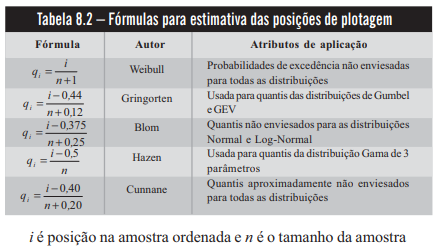

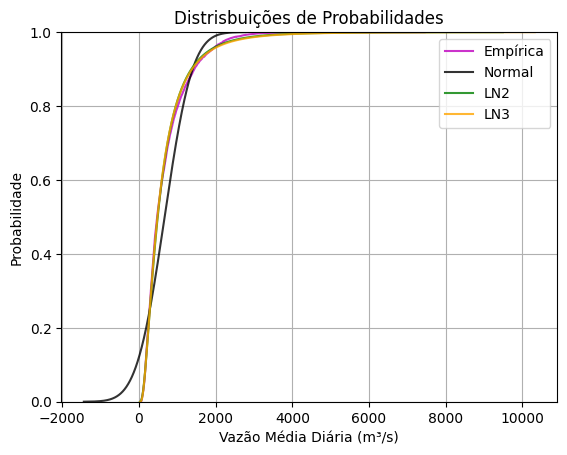

In [7]:
n = len(df['vazao'])
pos_plot_weibull = np.arange(1, n+1) / (n + 1)  # Os elementos do array geram um novo array com as posições de plotagem de weibull
dados_ordenados = df['vazao'].sort_values()  # Os dados são classificados em ordem para gerar a FDA empírica

# Distribuição Normal
norm = stats.norm.ppf(pos_plot_weibull, loc=df['vazao'].mean(), scale=df['vazao'].std())
# Distribuição Log-Normal 2 Parâmetros
lognorm2 = stats.norm.ppf(pos_plot_weibull, loc=np.log(df['vazao']).mean(), scale=np.log(df['vazao']).std())
lognorm2 = np.exp(lognorm2)
# Distribuição Log-Normal 3 Parâmetros
delta = (df['vazao'].min() * df['vazao'].max() - df['vazao'].median() ** 2) / (df['vazao'].min() + df['vazao'].max() - 2 * df['vazao'].median())
lognorm3 = stats.norm.ppf(pos_plot_weibull, loc=np.log(df['vazao'] - delta).mean(), scale=np.log(df['vazao'] - delta).std())
lognorm3 = np.exp(lognorm3) + delta

# Gráficos
fig, ax = plt.subplots()
plt.plot(dados_ordenados, pos_plot_weibull, label="Empírica", color='m', alpha=0.8)  # Distribuição Émpirica
plt.plot(norm, pos_plot_weibull, label="Normal", color='k', alpha=0.8)  # Distribuição Normal
plt.plot(lognorm2, pos_plot_weibull, label="LN2", color='g', alpha=0.8)  # Distribuição Log-Normal 2 Parâmetros
plt.plot(lognorm3, pos_plot_weibull, label="LN3", color='orange', alpha=0.8)  # Distribuição Log-Normal 3 Parâmetros

plt.xlabel('Vazão Média Diária (m³/s)')
plt.ylabel('Probabilidade')
plt.title('Distrisbuições de Probabilidades')
plt.ylim([0, 1])
plt.legend()
plt.grid()